<a href="https://colab.research.google.com/github/medhakashyap/Projects/blob/main/car_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**car price predictor**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics # used to evaluate our model

##**data collection and processing**

###**loading the data**

In [ ]:
car_dataset = pd.read_csv("/car data.csv")

###**inspecting the first 5 rows of the data frame**

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking rows and columns

car_dataset.shape

(301, 9)

###**analysing data**

In [ ]:
# getting info about this data set

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of missing values

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# from above we can say that we don't have any missing values
# checking distribution of catigorial data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


###**encoding categorial data**

In [ ]:
# convert text into numerical value which is easy for our ML model to understand

# petrol=0, diesel=1, cng=2
car_dataset.replace({"Fuel_Type":{"Petrol":0, "Diesel":1, "CNG":2}}, inplace=True)

# Seller_Type encoding
car_dataset.replace({"Seller_Type":{"Dealer":0, "Individual":1}}, inplace=True)

# Transmission column
car_dataset.replace({"Transmission":{"Manual":0, "Automatic":1}}, inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


###**spliting the data and target**

In [28]:
# selling price is our target
# we are removing car name and selling price, and using the rest for prediction
# dropping row, axis=0
# dropping col, axis=1

x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1) # represents data
y = car_dataset['Selling_Price'] # represents price in lakhs

In [26]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [27]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


###**spiltting training and test data**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)
# 90% training data
# 10% test data

##**model training**

###**linear regression**

In [30]:
# loading linear regression model

lin_reg_model = LinearRegression()

In [31]:
lin_reg_model.fit(x_train, y_train)
# fit func is used to train our model

LinearRegression()

####**model evaluation on training data**

In [32]:
# prediction on training data

training_data_prediction = lin_reg_model.predict(x_train)

In [35]:
# r squared error

error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error = ",error_score)

R squared error =  0.8799451660493711


####**visualise the predicted and actual price on training data**

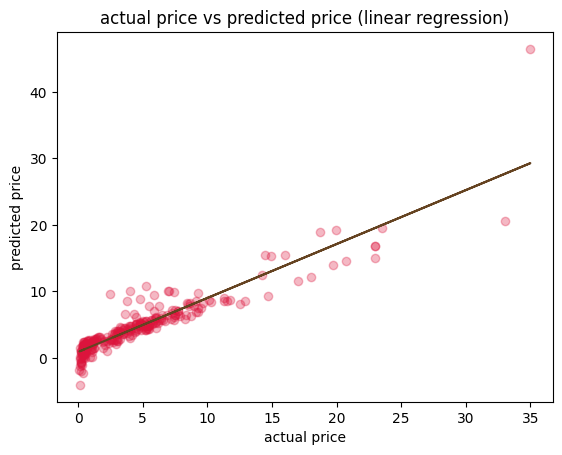

In [77]:
plt.scatter(y_train, training_data_prediction, color= "#dc143c",alpha=0.3)

z = np.polyfit(y_train, training_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "#654321")

plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price (linear regression)")
plt.show()

####**model evaluation on test data**

In [46]:
test_data_prediction = lin_reg_model.predict(x_test)

In [49]:
# r squared error

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error = ",error_score)

R squared error =  0.8365766715027051


####**visualise the predicted and actual price on test data**

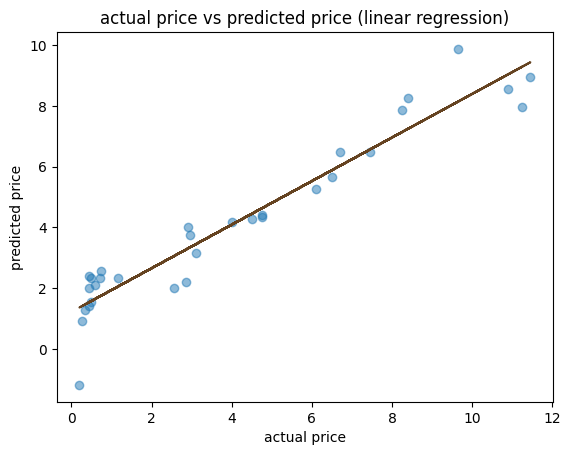

In [75]:
plt.scatter(y_test, test_data_prediction, alpha=0.5)

z = np.polyfit(y_test, test_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "#654321")

plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price (linear regression)")
plt.show()

###**lasso regression**

In [54]:
lasso_reg_model = Lasso()

In [55]:
lasso_reg_model.fit(x_train, y_train)

Lasso()

####**model evaluation on training model**

In [57]:
training_data_prediction = lasso_reg_model.predict(x_train)

In [62]:
# r squared error

error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error = ",error_score)

R squared error =  0.8427856123435794


####**visualise the predicted and actual price on training data**

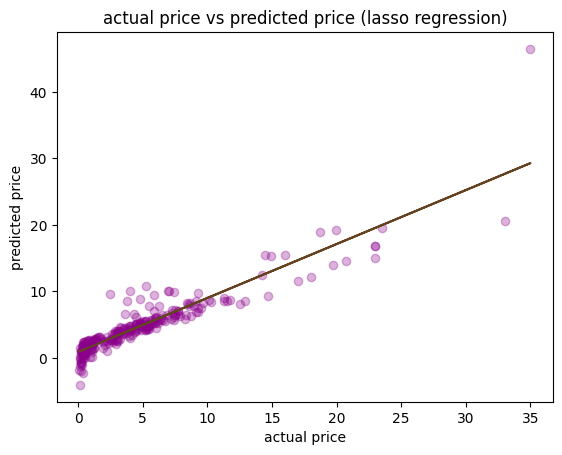

In [76]:
plt.scatter(y_train, training_data_prediction, color= "#8b008b",alpha=0.3)

z = np.polyfit(y_train, training_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "#654321")

plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price (lasso regression)")
plt.show()

####**model evaluation on test data**

In [66]:
test_data_prediction = lasso_reg_model.predict(x_test)

In [67]:
# r squared error

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error = ",error_score)

R squared error =  0.8709167941173195


####**visualise the predicted and actual price on test data**

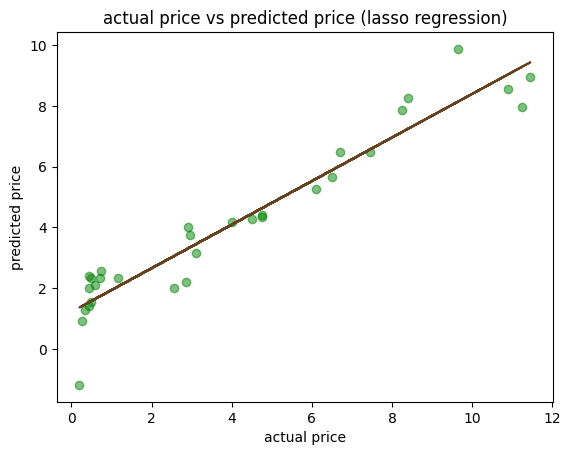

In [78]:
plt.scatter(y_test, test_data_prediction, color="#008000", alpha=0.5)

z = np.polyfit(y_test, test_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "#654321")

plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price (lasso regression)")
plt.show()